In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def get_feature_importance(model):
    Importance = model.get_fscore()
    Importance = list(Importance.items())
    Feature= []
    Score = []
    for each in Importance:
        Feature.append(each[0])
        Score.append(each[1])
    df = pd.DataFrame({'Feature':Feature,'Score':Score}).sort_values(by=['Score'],ascending=[0])
    return df   

## A: Only Log-transform price_doc 

In [36]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')
col = list(test.columns)[2:]
label = np.log(train['price_doc'])
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [21]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 4,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'lambda':0.5,
    'min_child_weight':3
}

[0]	train-rmse:14.3664	test-rmse:14.3664
[50]	train-rmse:1.20196	test-rmse:1.20565
[100]	train-rmse:0.458613	test-rmse:0.476743
[150]	train-rmse:0.438717	test-rmse:0.465258
[200]	train-rmse:0.429771	test-rmse:0.463796
[250]	train-rmse:0.422202	test-rmse:0.463162
[300]	train-rmse:0.415319	test-rmse:0.462931
[350]	train-rmse:0.408727	test-rmse:0.462799
Performance does not improve from 333 rounds


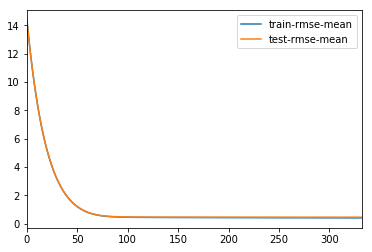

In [22]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [ ]:
#depth:4, min-child-weight:3,lambda:0.5
#[0]	train-rmse:14.3664	test-rmse:14.3664
#[50]	train-rmse:1.20196	test-rmse:1.20565
#[100]	train-rmse:0.458613	test-rmse:0.476743
#[150]	train-rmse:0.438717	test-rmse:0.465258
#[200]	train-rmse:0.429771	test-rmse:0.463796
#[250]	train-rmse:0.422202	test-rmse:0.463162
#[300]	train-rmse:0.415319	test-rmse:0.462931
#[350]	train-rmse:0.408727	test-rmse:0.462799
#Performance does not improve from 333 rounds
#depth 4, lambda 3, min child weight 3
#[0]	train-rmse:14.3667	test-rmse:14.3668
#[50]	train-rmse:1.20876	test-rmse:1.21087
#[100]	train-rmse:0.463081	test-rmse:0.47839
#[150]	train-rmse:0.442516	test-rmse:0.465603
#[200]	train-rmse:0.433578	test-rmse:0.463743
#[250]	train-rmse:0.425915	test-rmse:0.462933
#[300]	train-rmse:0.419329	test-rmse:0.462574
#Performance does not improve from 293 rounds
#depth 4, lambda 5. min child weight 3
#[0]	train-rmse:14.3668	test-rmse:14.3668
#[50]	train-rmse:1.21231	test-rmse:1.2143
#[100]	train-rmse:0.464918	test-rmse:0.479318
#[150]	train-rmse:0.443651	test-rmse:0.465615
#[200]	train-rmse:0.435032	test-rmse:0.463415
#[250]	train-rmse:0.427593	test-rmse:0.462476
#[300]	train-rmse:0.420895	test-rmse:0.462161
#[350]	train-rmse:0.414784	test-rmse:0.461902
#Performance does not improve from 361 rounds
#depth 4, lambda 5. min child weight 5
#[0]	train-rmse:14.3668	test-rmse:14.3668
#[50]	train-rmse:1.21257	test-rmse:1.21413
#[100]	train-rmse:0.46552	test-rmse:0.479222
#[150]	train-rmse:0.444665	test-rmse:0.466281
#[200]	train-rmse:0.435876	test-rmse:0.464013
#[250]	train-rmse:0.428707	test-rmse:0.463043
#[300]	train-rmse:0.422018	test-rmse:0.462564
#[350]	train-rmse:0.416097	test-rmse:0.462368

# try depth at 4 and lambda at 10
#[0]	train-rmse:14.3671	test-rmse:14.3671
#[50]	train-rmse:1.21788	test-rmse:1.22041
#[100]	train-rmse:0.466758	test-rmse:0.48137
#[150]	train-rmse:0.445119	test-rmse:0.46684
#[200]	train-rmse:0.436192	test-rmse:0.464259
#[250]	train-rmse:0.429041	test-rmse:0.463107
#[300]	train-rmse:0.422564	test-rmse:0.462636
#[350]	train-rmse:0.416646	test-rmse:0.462382
#[400]	train-rmse:0.410885	test-rmse:0.462403
#Performance does not improve from 387 rounds
#depth at 4, lambda at 5
#[0]	train-rmse:14.3668	test-rmse:14.3668
#[50]	train-rmse:1.21173	test-rmse:1.21466
#[100]	train-rmse:0.463052	test-rmse:0.479369
#[150]	train-rmse:0.442198	test-rmse:0.466336
#[200]	train-rmse:0.433416	test-rmse:0.463934
#[250]	train-rmse:0.425658	test-rmse:0.462974
#[300]	train-rmse:0.419024	test-rmse:0.462558
#[350]	train-rmse:0.413006	test-rmse:0.462214
#Performance does not improve from 349 rounds
#try depth at 5
#[0]	train-rmse:14.3665	test-rmse:14.3665
#[50]	train-rmse:1.20143	test-rmse:1.20766
#[100]	train-rmse:0.443987	test-rmse:0.475624
#[150]	train-rmse:0.419087	test-rmse:0.464555
#[200]	train-rmse:0.406446	test-rmse:0.4635
#[250]	train-rmse:0.395101	test-rmse:0.463046
#Performance does not improve from 256 rounds
#try depth at 4
#[0]	train-rmse:14.3665	test-rmse:14.3665
#[50]	train-rmse:1.20354	test-rmse:1.20703
#[100]	train-rmse:0.458983	test-rmse:0.477411
#[150]	train-rmse:0.438668	test-rmse:0.465649
#[200]	train-rmse:0.429676	test-rmse:0.464159
#[250]	train-rmse:0.42183	test-rmse:0.463344
#[300]	train-rmse:0.415131	test-rmse:0.463001
#Performance does not improve from 286 rounds
#try depth at 3
#[0]	train-rmse:14.3665	test-rmse:14.3665
#[50]	train-rmse:1.20597	test-rmse:1.2078
#[100]	train-rmse:0.471752	test-rmse:0.48069
#[150]	train-rmse:0.45502	test-rmse:0.468587
#[200]	train-rmse:0.448748	test-rmse:0.466303
#[250]	train-rmse:0.443657	test-rmse:0.465044
#[300]	train-rmse:0.439167	test-rmse:0.464202
#[350]	train-rmse:0.435074	test-rmse:0.463621
#[400]	train-rmse:0.431216	test-rmse:0.463446
#[450]	train-rmse:0.427577	test-rmse:0.463239
#[500]	train-rmse:0.424193	test-rmse:0.46308
#Performance does not improve from 493 rounds
#try depth at 2
#[0]	train-rmse:14.3665	test-rmse:14.3665
#[50]	train-rmse:1.20992	test-rmse:1.21082
#[100]	train-rmse:0.483268	test-rmse:0.487074
#[150]	train-rmse:0.46842	test-rmse:0.473983
#[200]	train-rmse:0.463653	test-rmse:0.470916
#[250]	train-rmse:0.459992	test-rmse:0.468969
#[300]	train-rmse:0.457118	test-rmse:0.467798
#[350]	train-rmse:0.454757	test-rmse:0.46703
#[400]	train-rmse:0.452592	test-rmse:0.466354
#[450]	train-rmse:0.450576	test-rmse:0.465871
#[500]	train-rmse:0.448706	test-rmse:0.465439
#[550]	train-rmse:0.446825	test-rmse:0.465103
#[600]	train-rmse:0.445103	test-rmse:0.464853
#[650]	train-rmse:0.443399	test-rmse:0.464659
#Performance does not improve from 632 rounds


In [37]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 4,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'lambda':5,
    'min_child_weight':3
}

In [38]:
model = xgb.train(params,dtrain,num_boost_round= 361)

In [39]:
get_feature_importance(model)

,Feature,Score
8,full_sq,313
21,build_year,139
160,floor,105
40,max_floor,92
91,life_sq,87
87,kindergarten_km,83
103,green_zone_km,74
57,railroad_km,58
174,public_transport_station_km,56
181,mosque_km,53


In [32]:
pred = model.predict(dtest)

In [33]:
predict = np.exp(pred)

In [34]:
sub = pd.DataFrame({'id':test['id'],'price_doc':predict})
sub.to_csv('LogPriceParameterTunning.csv',index=False)

**LB Performance: No improvement compared with any single model. Also, no need to multply a ratio here. It drags down the performance.**

# B: Log full_sq and life_sq with 0.95 and normal label

In [40]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')

In [41]:
#clean data
bad_index = train[train.life_sq > train.full_sq].index
train.ix[bad_index, "life_sq"] = np.NaN
equal_index = [601,1896,2791]
test.ix[equal_index, "life_sq"] = test.ix[equal_index, "full_sq"]
bad_index = test[test.life_sq > test.full_sq].index
test.ix[bad_index, "life_sq"] = np.NaN
bad_index = train[train.life_sq < 5].index
train.ix[bad_index, "life_sq"] = np.NaN
bad_index = test[test.life_sq < 5].index
test.ix[bad_index, "life_sq"] = np.NaN
bad_index = train[train.full_sq < 5].index
train.ix[bad_index, "full_sq"] = np.NaN
bad_index = test[test.full_sq < 5].index
test.ix[bad_index, "full_sq"] = np.NaN
kitch_is_build_year = [13117]
train.ix[kitch_is_build_year, "build_year"] = train.ix[kitch_is_build_year, "kitch_sq"]
bad_index = train[train.kitch_sq >= train.life_sq].index
train.ix[bad_index, "kitch_sq"] = np.NaN
bad_index = test[test.kitch_sq >= test.life_sq].index
test.ix[bad_index, "kitch_sq"] = np.NaN
bad_index = train[(train.kitch_sq == 0).values + (train.kitch_sq == 1).values].index
train.ix[bad_index, "kitch_sq"] = np.NaN
bad_index = test[(test.kitch_sq == 0).values + (test.kitch_sq == 1).values].index
test.ix[bad_index, "kitch_sq"] = np.NaN
bad_index = train[(train.full_sq > 210) & (train.life_sq / train.full_sq < 0.3)].index
train.ix[bad_index, "full_sq"] = np.NaN
bad_index = test[(test.full_sq > 150) & (test.life_sq / test.full_sq < 0.3)].index
test.ix[bad_index, "full_sq"] = np.NaN
bad_index = train[train.life_sq > 300].index
train.ix[bad_index, ["life_sq", "full_sq"]] = np.NaN
bad_index = test[test.life_sq > 200].index
test.ix[bad_index, ["life_sq", "full_sq"]] = np.NaN
train.product_type.value_counts(normalize= True)
test.product_type.value_counts(normalize= True)
bad_index = train[train.build_year < 1500].index
train.ix[bad_index, "build_year"] = np.NaN
bad_index = test[test.build_year < 1500].index
test.ix[bad_index, "build_year"] = np.NaN
bad_index = train[train.num_room == 0].index 
train.ix[bad_index, "num_room"] = np.NaN
bad_index = test[test.num_room == 0].index 
test.ix[bad_index, "num_room"] = np.NaN
bad_index = [10076, 11621, 17764, 19390, 24007, 26713, 29172]
train.ix[bad_index, "num_room"] = np.NaN
bad_index = [3174, 7313]
test.ix[bad_index, "num_room"] = np.NaN
bad_index = train[(train.floor == 0).values * (train.max_floor == 0).values].index
train.ix[bad_index, ["max_floor", "floor"]] = np.NaN
bad_index = train[train.floor == 0].index
train.ix[bad_index, "floor"] = np.NaN
bad_index = train[train.max_floor == 0].index
train.ix[bad_index, "max_floor"] = np.NaN
bad_index = test[test.max_floor == 0].index
test.ix[bad_index, "max_floor"] = np.NaN
bad_index = train[train.floor > train.max_floor].index
train.ix[bad_index, "max_floor"] = np.NaN
bad_index = test[test.floor > test.max_floor].index
test.ix[bad_index, "max_floor"] = np.NaN
train.floor.describe(percentiles= [0.9999])
bad_index = [23584]
train.ix[bad_index, "floor"] = np.NaN
train.material.value_counts()
test.material.value_counts()
train.state.value_counts()
bad_index = train[train.state == 33].index
train.ix[bad_index, "state"] = np.NaN
test.state.value_counts()

# brings error down a lot by removing extreme price per sqm
train.loc[train.full_sq == 0, 'full_sq'] = 50
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]

In [42]:
train['full_sq'] = np.log(train['full_sq'])

In [44]:
train['life_sq'] = np.log(test['life_sq'])

In [56]:
test['full_sq'] = np.log(test['full_sq'])
test['life_sq'] = np.log(test['life_sq'])

In [67]:
col = list(test.columns)[2:]
#label = train['price_doc']*0.95 +10
label = train['price_doc']
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [68]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

[0]	train-rmse:8.22157e+06	test-rmse:8.22932e+06
[50]	train-rmse:2.46556e+06	test-rmse:2.80427e+06
[100]	train-rmse:2.11996e+06	test-rmse:2.59765e+06
[150]	train-rmse:2.01262e+06	test-rmse:2.55327e+06
[200]	train-rmse:1.9313e+06	test-rmse:2.5323e+06
[250]	train-rmse:1.86666e+06	test-rmse:2.52052e+06
[300]	train-rmse:1.81049e+06	test-rmse:2.51295e+06
[350]	train-rmse:1.75958e+06	test-rmse:2.50926e+06
[400]	train-rmse:1.7137e+06	test-rmse:2.50742e+06
Performance does not improve from 403 rounds


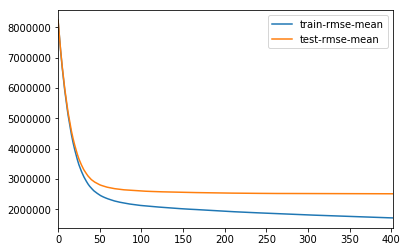

In [69]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [75]:
#[0]	train-rmse:7.8105e+06	test-rmse:7.81786e+06
#[50]	train-rmse:2.34228e+06	test-rmse:2.66406e+06
#[100]	train-rmse:2.01396e+06	test-rmse:2.46776e+06
#[150]	train-rmse:1.91199e+06	test-rmse:2.42561e+06
#[200]	train-rmse:1.83473e+06	test-rmse:2.40568e+06
#[250]	train-rmse:1.77332e+06	test-rmse:2.39449e+06
#[300]	train-rmse:1.71996e+06	test-rmse:2.3873e+06
#[350]	train-rmse:1.6716e+06	test-rmse:2.3838e+06
#[400]	train-rmse:1.62801e+06	test-rmse:2.38205e+06
#Performance does not improve from 403 rounds

In [70]:
model = xgb.train(params,dtrain,num_boost_round=403)

In [71]:
pred = model.predict(dtest)

In [72]:
pred

array([ 5386181. ,  8140035.5,  5320504. , ...,  4606732.5,  5311121. ,
        8405152. ], dtype=float32)

In [73]:
get_feature_importance(model)

,Feature,Score
10,full_sq,1366
163,floor,400
52,build_year,393
47,max_floor,294
216,kitch_sq,201
147,num_room,195
96,life_sq,168
221,state,139
98,material,117
109,green_zone_km,111


In [74]:
sub = pd.DataFrame({'id':test['id'],'price_doc':pred})
sub.to_csv('xgb_logsqsnormallabel.csv',index=False)

# 3: Log Transform Both Data

In [76]:
col = list(test.columns)[2:]
#label = train['price_doc']*0.95 +10
label = np.log(train['price_doc'])
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [82]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 4,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'lambda':5,
    'min_child_weight':3
}

[0]	train-rmse:14.369	test-rmse:14.369
[50]	train-rmse:1.209	test-rmse:1.21053
[100]	train-rmse:0.455967	test-rmse:0.469115
[150]	train-rmse:0.435003	test-rmse:0.456261
[200]	train-rmse:0.42554	test-rmse:0.453838
[250]	train-rmse:0.417846	test-rmse:0.45299
[300]	train-rmse:0.411344	test-rmse:0.452595
[350]	train-rmse:0.405451	test-rmse:0.452522
Performance does not improve from 381 rounds


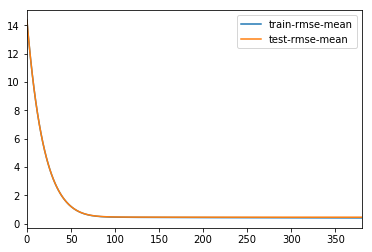

In [83]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [84]:
model = xgb.train(params,dtrain,num_boost_round=381)

In [85]:
pred = model.predict(dtest)

In [88]:
sub = pd.DataFrame({'id':test['id'],'price_doc':np.exp(pred)})

In [90]:
sub.to_csv('xgb_fulllifepricealllog.csv',index=False)

In [91]:
get_feature_importance(model)

,Feature,Score
8,full_sq,284
7,build_year,166
164,floor,127
42,max_floor,93
103,green_zone_km,77
92,life_sq,77
89,kindergarten_km,68
225,workplaces_km,62
168,public_transport_station_km,61
87,fitness_km,60
